In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from itertools import product

In [13]:
#importing the data
customerDf = pd.read_excel('customer_retention_dataset.xlsx', sheet_name='datasheet')
customerDf.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [14]:
# Checking for missing values
customerDf.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [15]:
# Checking dataset dimension
customerDf.shape

(269, 71)

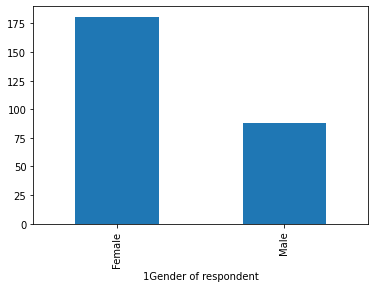

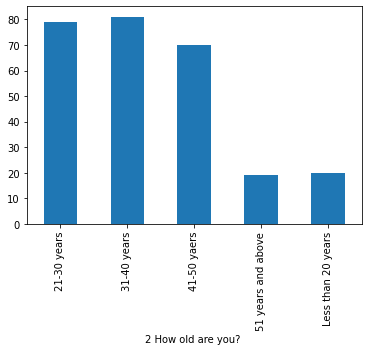

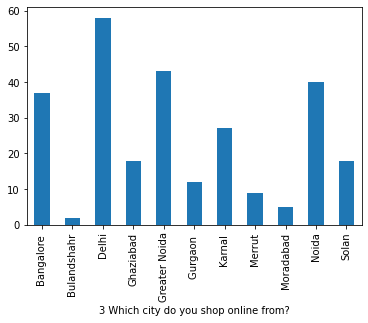

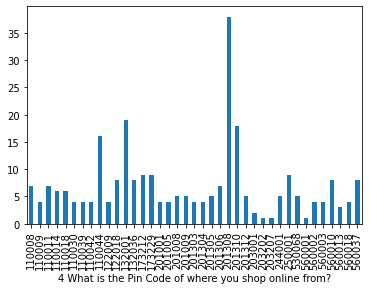

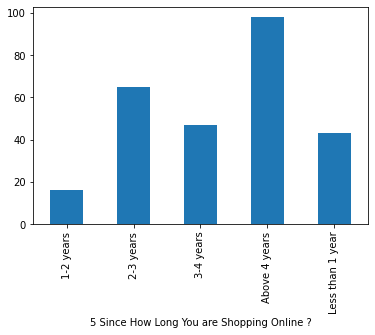

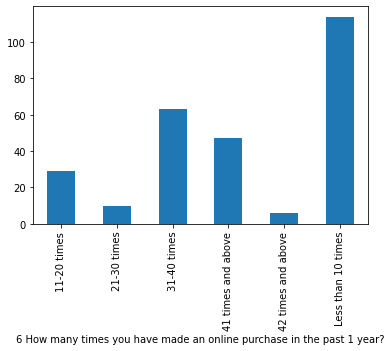

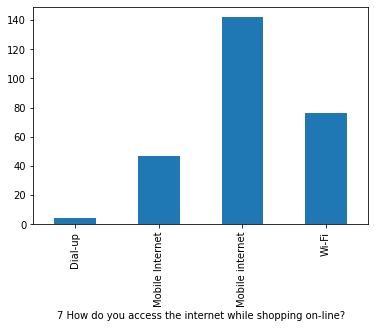

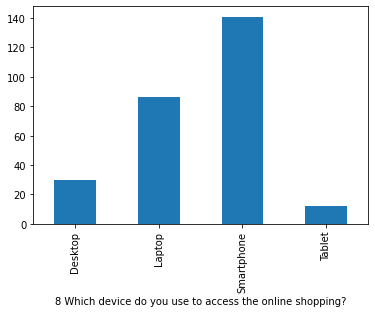

C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


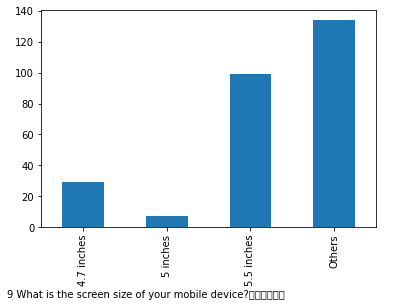

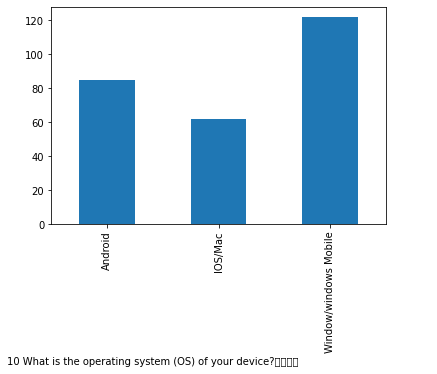

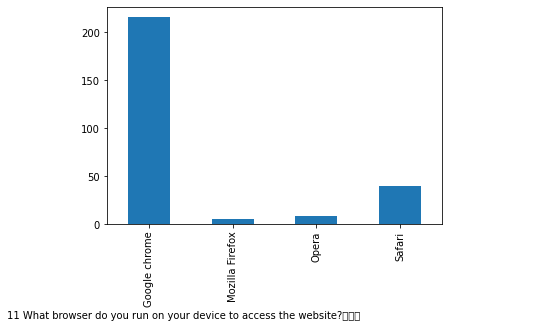

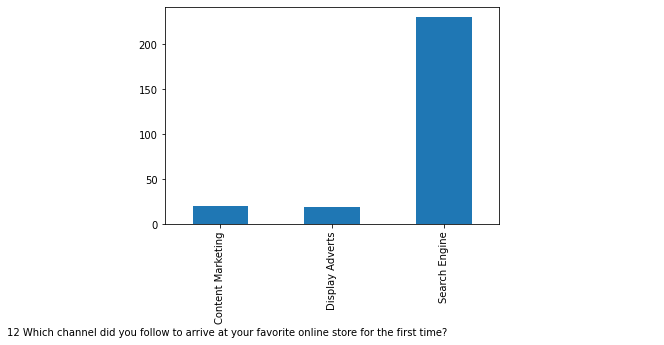

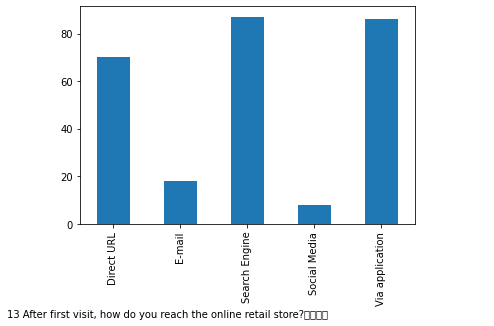

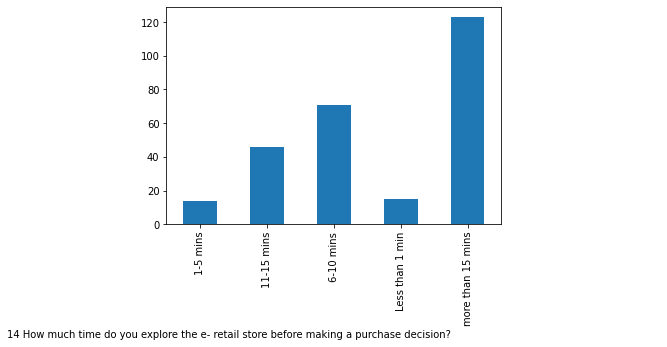

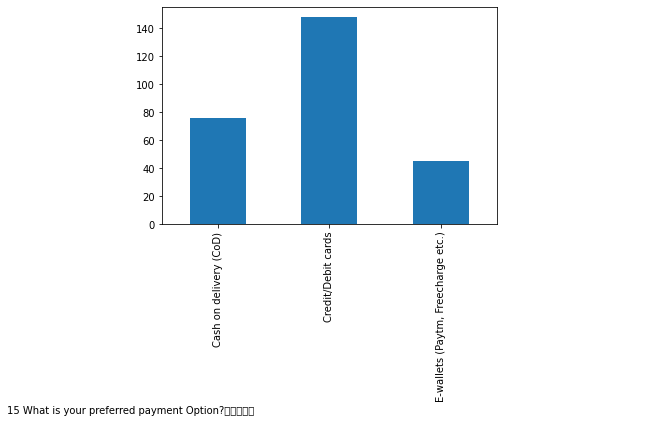

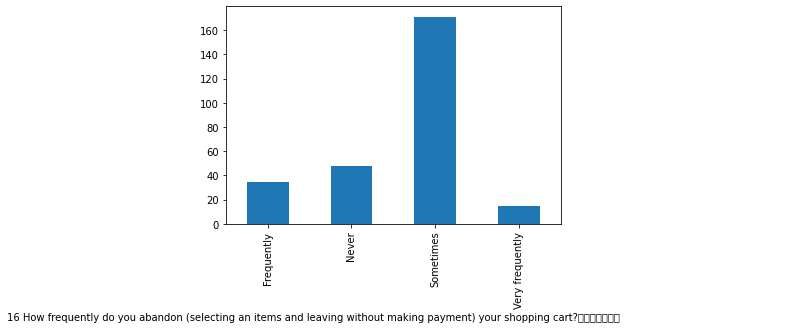

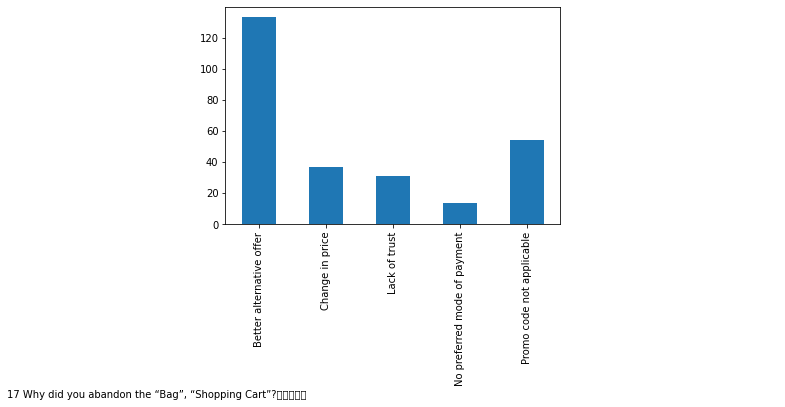

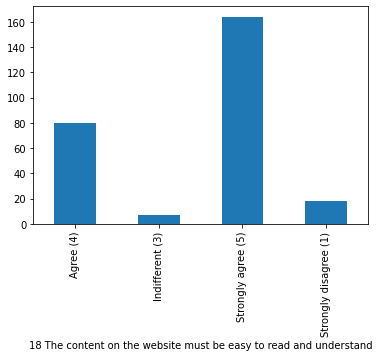

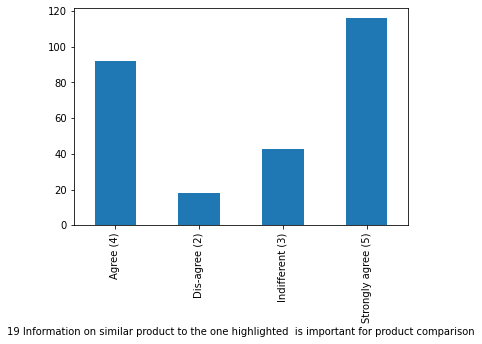

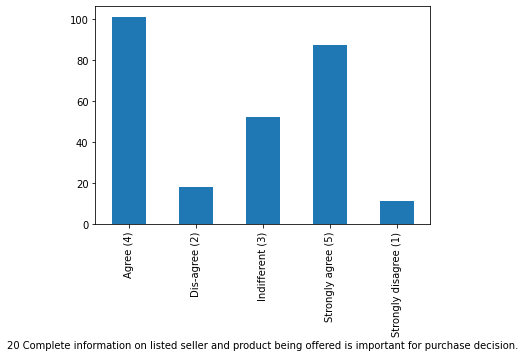

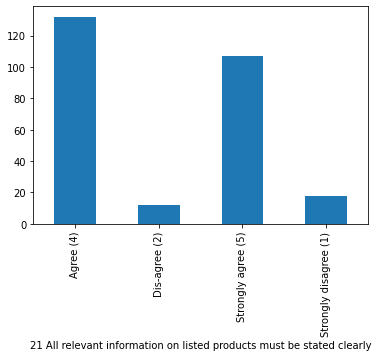

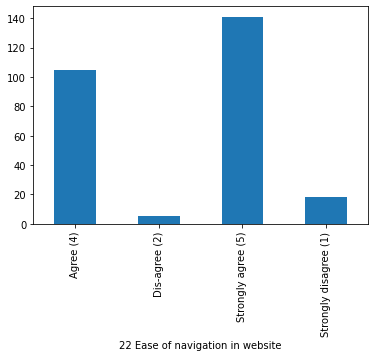

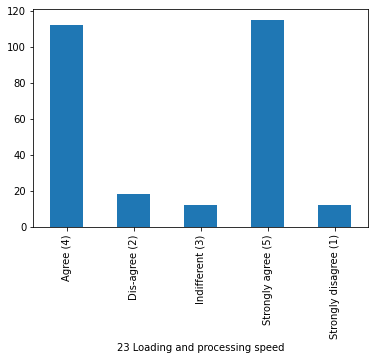

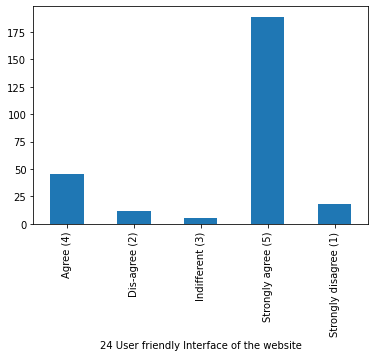

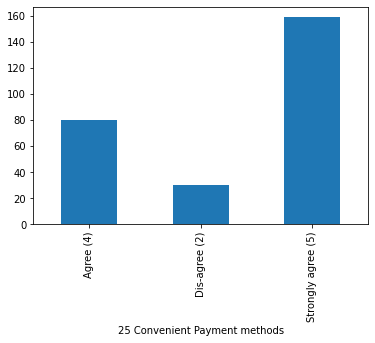

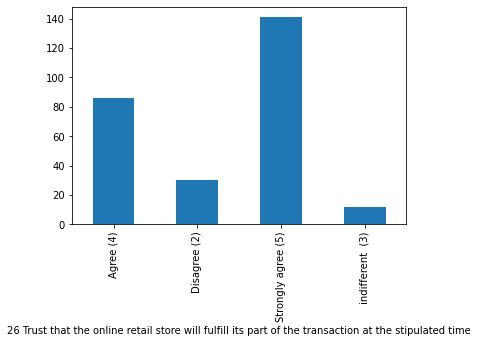

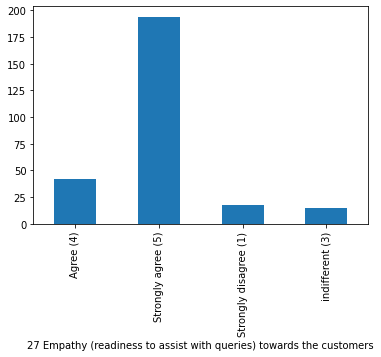

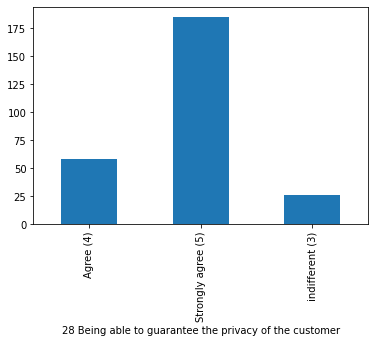

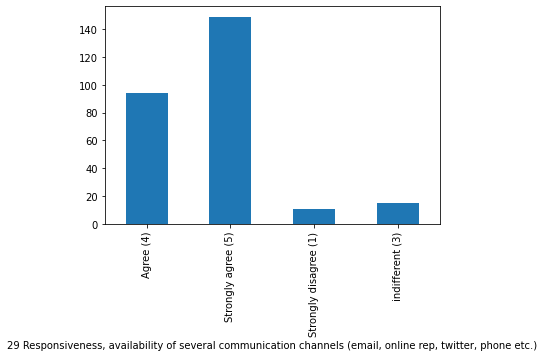

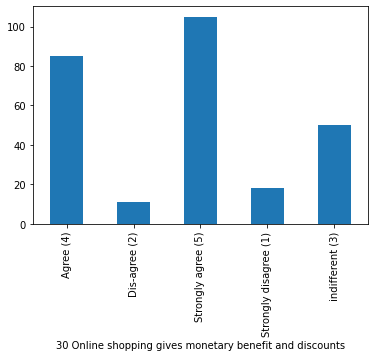

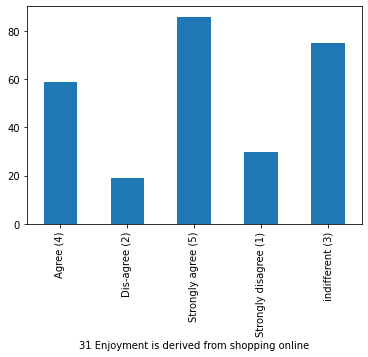

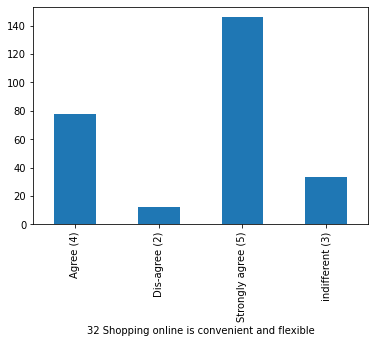

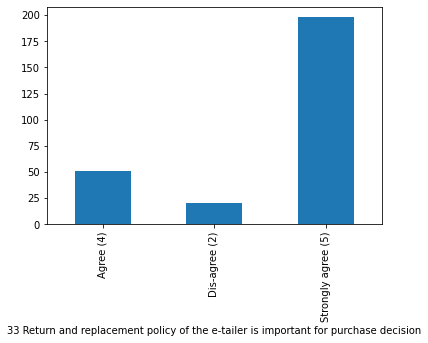

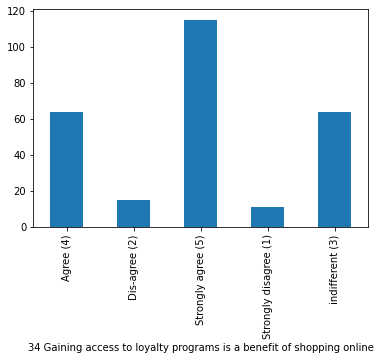

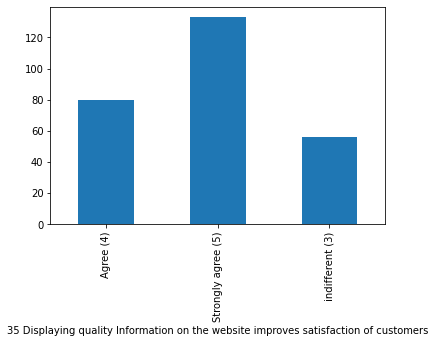

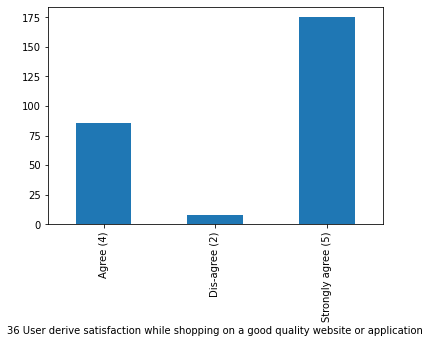

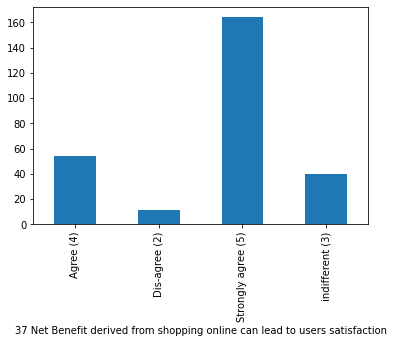

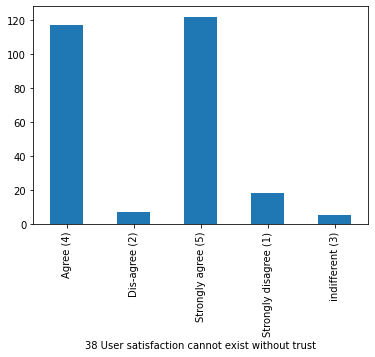

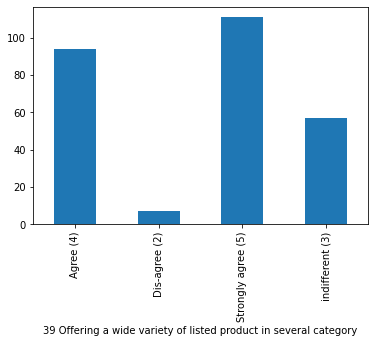

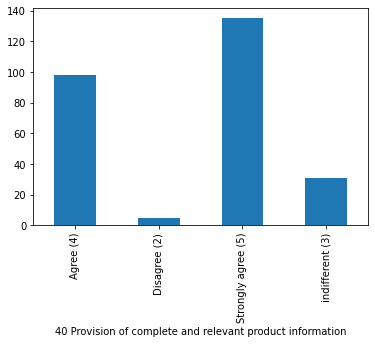

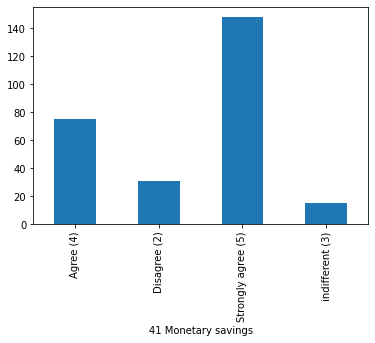

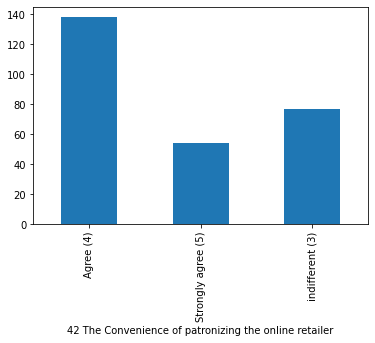

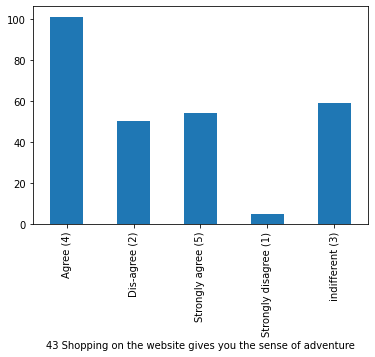

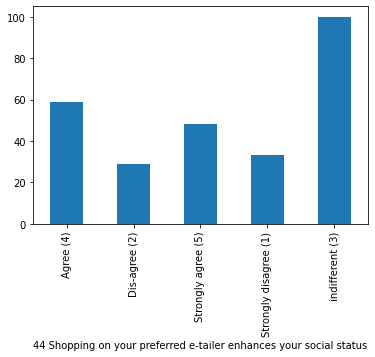

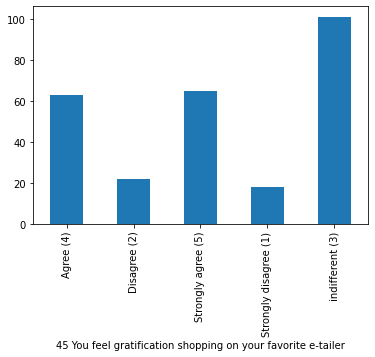

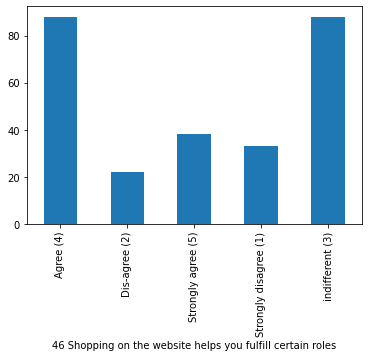

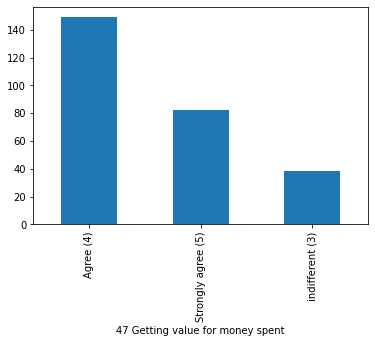

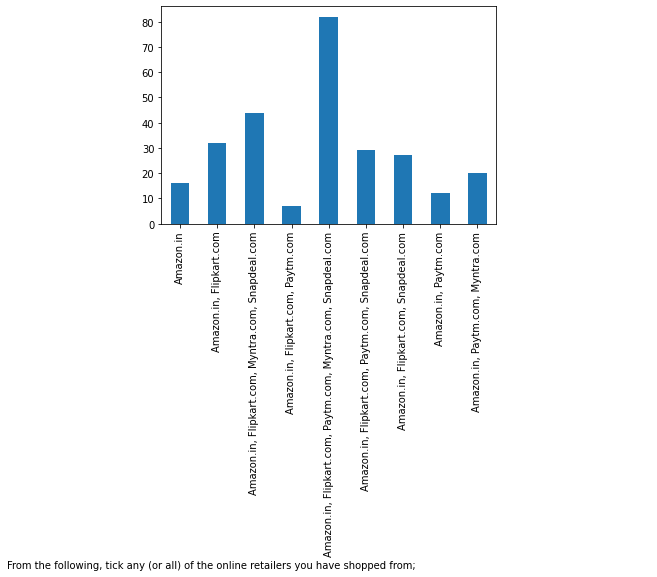

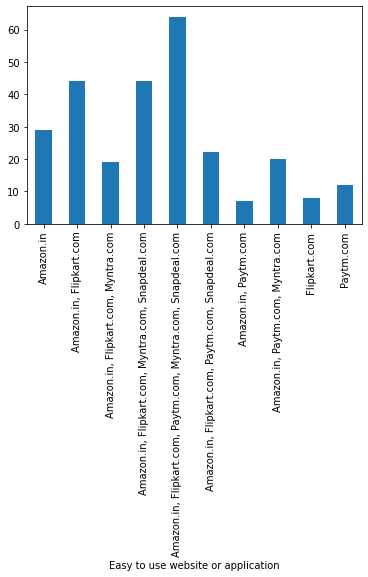

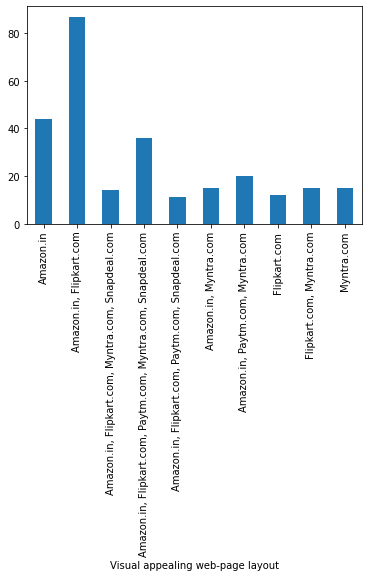

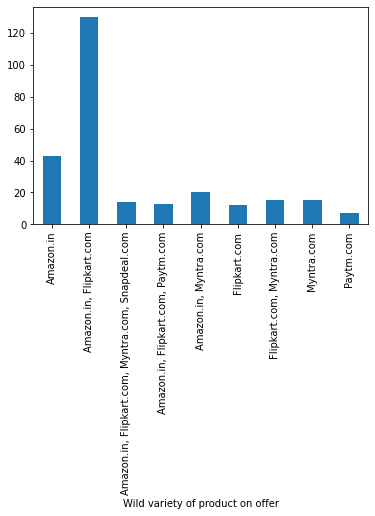

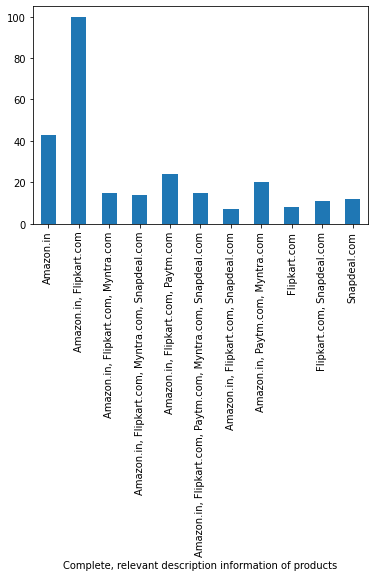

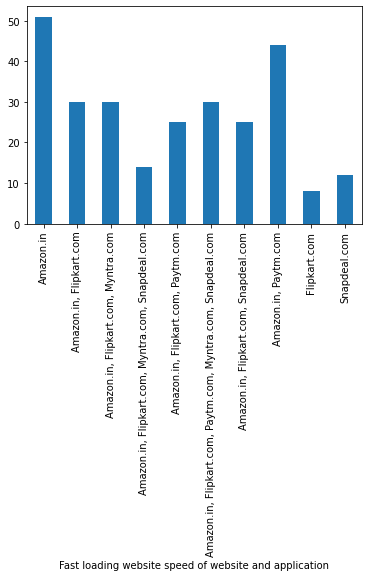

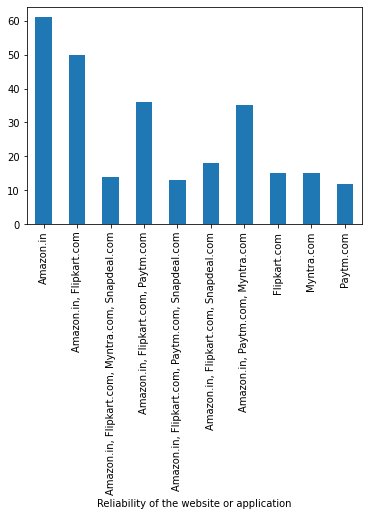

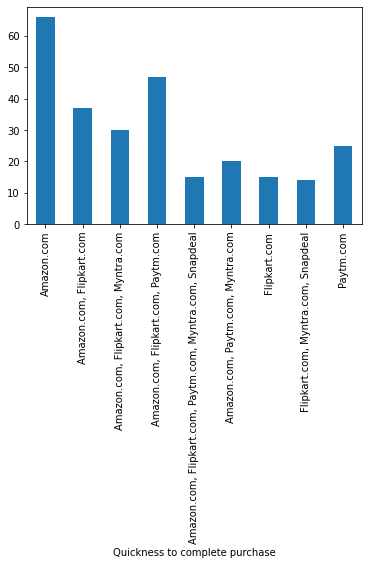

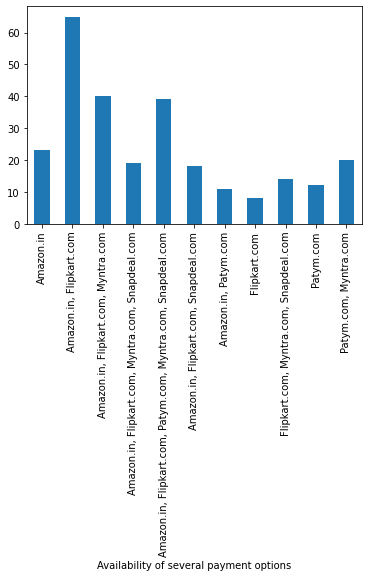

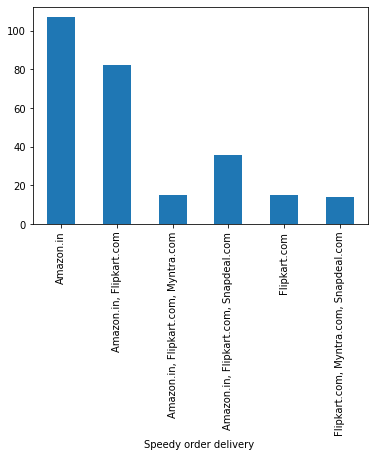

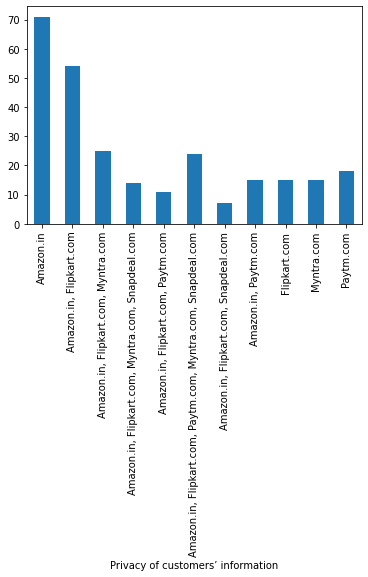

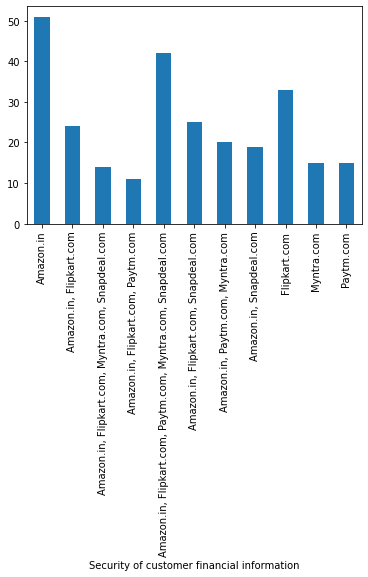

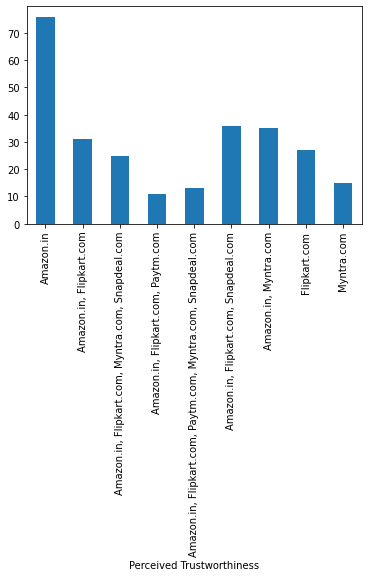

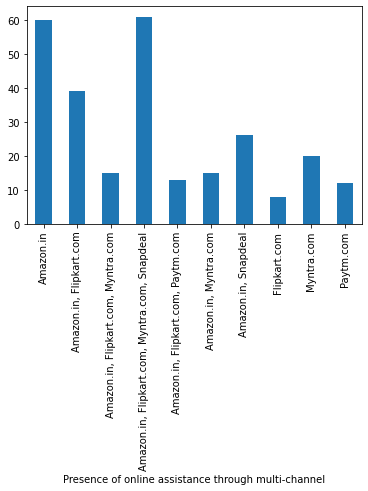

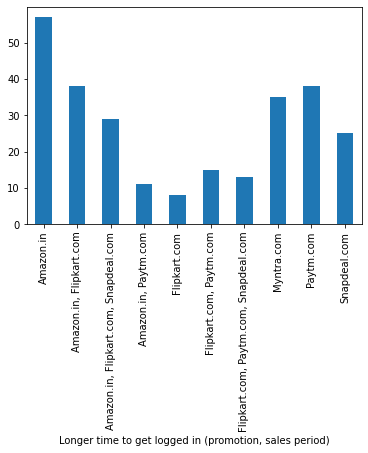

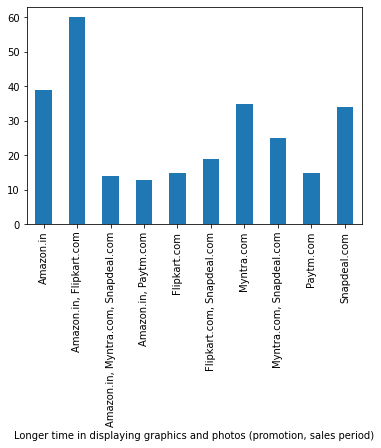

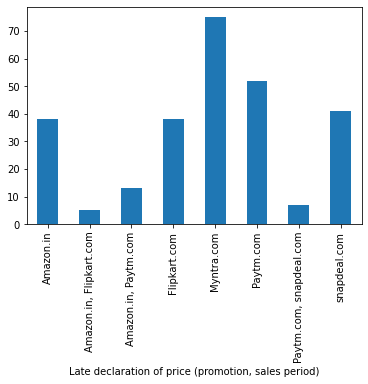

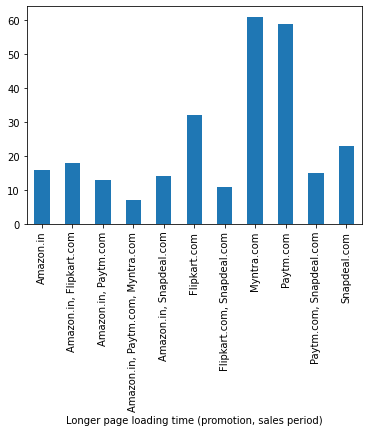

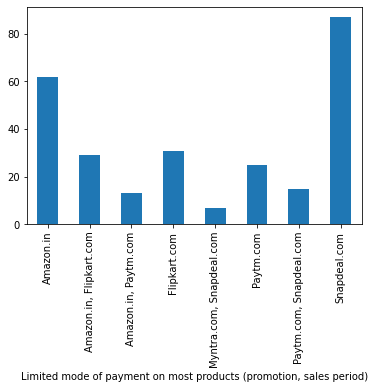

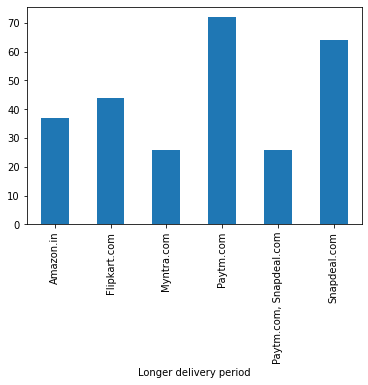

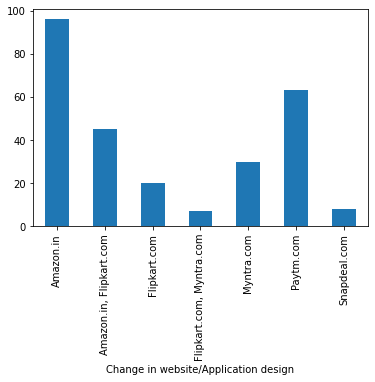

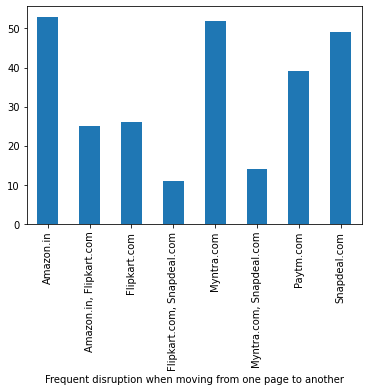

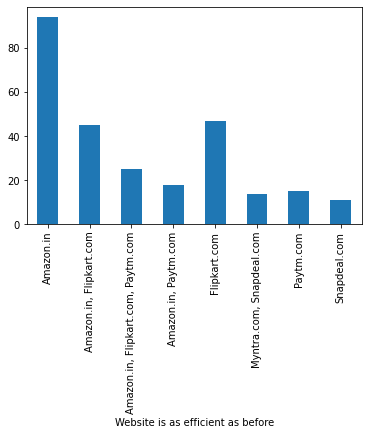

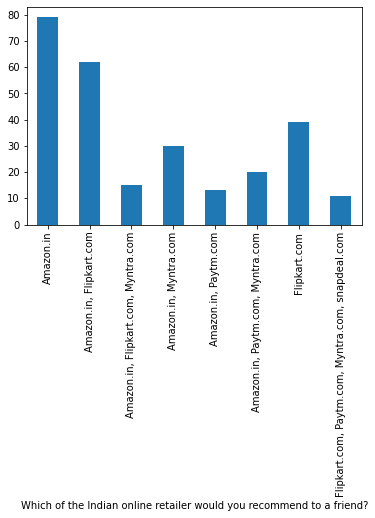

In [16]:
# Visualing each column
for cols in customerDf.columns:
    customerDf.groupby(cols)[cols].count().plot(kind = 'bar')
    plt.show()

In [25]:
customerDf[customerDf['2 How old are you? '] == '51 years and above']['8 Which device do you use to access the online shopping?'].value_counts()

Smartphone    8
Laptop        7
Desktop       3
Tablet        1
Name: 8 Which device do you use to access the online shopping?, dtype: int64

In [6]:
#Defining a function to tell us if a column has any significant relation with other categorical column
def chi2IndependenceTest(col1, col2):
    
    crossTab = pd.crosstab(customerDf[col1], customerDf[col2], margins=True, margins_name='Total')
    observedVal = crossTab.values
    expectedVal = stats.chi2_contingency(crossTab)[3]
    rowNum = (crossTab.shape[0] - 1)
    columnNum = (crossTab.shape[1] - 1)
    doF=(rowNum-1)*(columnNum-1)
    chiSquare=sum([(o-e)**2./e for o,e in zip(observedVal, expectedVal)])
    chiSquareStatistic=chiSquare[0]+chiSquare[1]
    pValue=1-stats.chi2.cdf(x=chiSquareStatistic,df=doF)
    
    return doF, pValue

In [8]:
# Creating a list containing all possible combinations of columns
columnCobination = [i for i in list(product(customerDf, customerDf)) if i[0] != i[1]]

In [9]:
#Performing chi-square test of independence on each column pairs in columnCobination and appeding all significant column pairs 
#to a list (significantCombo)

significantCombo = list()

for combo in columnCobination:
    d, p = chi2IndependenceTest(combo[0], combo[1])
    if p < 0.01:
        print(f'Column {combo[0]} and {combo[1]} have significant relation\n')
        significantCombo.append(combo)

Column 1Gender of respondent and 7 How do you access the internet while shopping on-line? have significant relation

Column 1Gender of respondent and 25 Convenient Payment methods have significant relation

Column 1Gender of respondent and 30 Online shopping gives monetary benefit and discounts have significant relation

Column 1Gender of respondent and 34 Gaining access to loyalty programs is a benefit of shopping online have significant relation

Column 1Gender of respondent and 35 Displaying quality Information on the website improves satisfaction of customers have significant relation

Column 1Gender of respondent and 36 User derive satisfaction while shopping on a good quality website or application have significant relation

Column 1Gender of respondent and 37 Net Benefit derived from shopping online can lead to users satisfaction have significant relation

Column 1Gender of respondent and 40 Provision of complete and relevant product information have significant relation

Column

Column 3 Which city do you shop online from? and Late declaration of price (promotion, sales period) have significant relation

Column 3 Which city do you shop online from? and Longer delivery period have significant relation

Column 4 What is the Pin Code of where you shop online from? and 1Gender of respondent have significant relation

Column 4 What is the Pin Code of where you shop online from? and 2 How old are you?  have significant relation

Column 4 What is the Pin Code of where you shop online from? and 3 Which city do you shop online from? have significant relation

Column 4 What is the Pin Code of where you shop online from? and 5 Since How Long You are Shopping Online ? have significant relation

Column 4 What is the Pin Code of where you shop online from? and 7 How do you access the internet while shopping on-line? have significant relation

Column 4 What is the Pin Code of where you shop online from? and 9 What is the screen size of your mobile device?						              

Column 5 Since How Long You are Shopping Online ? and 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) have significant relation

Column 5 Since How Long You are Shopping Online ? and 33 Return and replacement policy of the e-tailer is important for purchase decision have significant relation

Column 5 Since How Long You are Shopping Online ? and 35 Displaying quality Information on the website improves satisfaction of customers have significant relation

Column 5 Since How Long You are Shopping Online ? and 36 User derive satisfaction while shopping on a good quality website or application have significant relation

Column 5 Since How Long You are Shopping Online ? and 40 Provision of complete and relevant product information have significant relation

Column 5 Since How Long You are Shopping Online ? and 47 Getting value for money spent have significant relation

Column 5 Since How Long You are Shopping Online ? and From the f

Column 7 How do you access the internet while shopping on-line? and 40 Provision of complete and relevant product information have significant relation

Column 7 How do you access the internet while shopping on-line? and 41 Monetary savings have significant relation

Column 8 Which device do you use to access the online shopping? and 1Gender of respondent have significant relation

Column 8 Which device do you use to access the online shopping? and 9 What is the screen size of your mobile device?						                                         have significant relation

Column 8 Which device do you use to access the online shopping? and 10 What is the operating system (OS) of your device?				                                           have significant relation

Column 8 Which device do you use to access the online shopping? and 11 What browser do you run on your device to access the website?			                                                           have significant relation

Column 8 W

Column 8 Which device do you use to access the online shopping? and Presence of online assistance through multi-channel have significant relation

Column 8 Which device do you use to access the online shopping? and Longer time to get logged in (promotion, sales period) have significant relation

Column 8 Which device do you use to access the online shopping? and Longer time in displaying graphics and photos (promotion, sales period) have significant relation

Column 8 Which device do you use to access the online shopping? and Longer page loading time (promotion, sales period) have significant relation

Column 8 Which device do you use to access the online shopping? and Limited mode of payment on most products (promotion, sales period) have significant relation

Column 8 Which device do you use to access the online shopping? and Longer delivery period have significant relation

Column 8 Which device do you use to access the online shopping? and Frequent disruption when moving from one p

Column 9 What is the screen size of your mobile device?						                                         and Visual appealing web-page layout have significant relation

Column 9 What is the screen size of your mobile device?						                                         and Wild variety of product on offer have significant relation

Column 9 What is the screen size of your mobile device?						                                         and Fast loading website speed of website and application have significant relation

Column 9 What is the screen size of your mobile device?						                                         and Reliability of the website or application have significant relation

Column 9 What is the screen size of your mobile device?						                                         and Availability of several payment options have significant relation

Column 9 What is the screen size of your mobile device?						                                         and Speedy order delivery  have

Column 10 What is the operating system (OS) of your device?				                                           and 35 Displaying quality Information on the website improves satisfaction of customers have significant relation

Column 10 What is the operating system (OS) of your device?				                                           and 36 User derive satisfaction while shopping on a good quality website or application have significant relation

Column 10 What is the operating system (OS) of your device?				                                           and 37 Net Benefit derived from shopping online can lead to users satisfaction have significant relation

Column 10 What is the operating system (OS) of your device?				                                           and 38 User satisfaction cannot exist without trust have significant relation

Column 10 What is the operating system (OS) of your device?				                                           and 39 Offering a wide variety of listed product in sev

Column 11 What browser do you run on your device to access the website?			                                                           and 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    have significant relation

Column 11 What browser do you run on your device to access the website?			                                                           and 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        have significant relation

Column 11 What browser do you run on your device to access the website?			                                                           and 19 Information on similar product to the one highlighted  is important for product comparison have significant relation

Column 11 What browser do you run on your device 

Column 11 What browser do you run on your device to access the website?			                                                           and Change in website/Application design have significant relation

Column 11 What browser do you run on your device to access the website?			                                                           and Frequent disruption when moving from one page to another have significant relation

Column 11 What browser do you run on your device to access the website?			                                                           and Which of the Indian online retailer would you recommend to a friend? have significant relation

Column 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    and 1Gender of respondent have significant relation

Column 12 Which channel did you follow to arrive at your favorite online store for the first time?                            

Column 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    and Longer time in displaying graphics and photos (promotion, sales period) have significant relation

Column 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    and Late declaration of price (promotion, sales period) have significant relation

Column 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    and Longer page loading time (promotion, sales period) have significant relation

Column 13 After first visit, how do you reach the online retail store?				                                                    and 8 Which device do you use to access the online shopping? have significant relation

Column 13 After firs

Column 13 After first visit, how do you reach the online retail store?				                                                    and 40 Provision of complete and relevant product information have significant relation

Column 13 After first visit, how do you reach the online retail store?				                                                    and 41 Monetary savings have significant relation

Column 13 After first visit, how do you reach the online retail store?				                                                    and 42 The Convenience of patronizing the online retailer have significant relation

Column 13 After first visit, how do you reach the online retail store?				                                                    and 43 Shopping on the website gives you the sense of adventure have significant relation

Column 13 After first visit, how do you reach the online retail store?				                                                    and 44 Shopping on your preferred e-tailer enhances yo

Column 14 How much time do you explore the e- retail store before making a purchase decision?                                                                    and 22 Ease of navigation in website have significant relation

Column 14 How much time do you explore the e- retail store before making a purchase decision?                                                                    and 23 Loading and processing speed have significant relation

Column 14 How much time do you explore the e- retail store before making a purchase decision?                                                                    and 24 User friendly Interface of the website have significant relation

Column 14 How much time do you explore the e- retail store before making a purchase decision?                                                                    and 25 Convenient Payment methods have significant relation

Column 14 How much time do you explore the e- retail store before making a purchase decision?  

Column 14 How much time do you explore the e- retail store before making a purchase decision?                                                                    and Which of the Indian online retailer would you recommend to a friend? have significant relation

Column 15 What is your preferred payment Option?					                                                                                                                                and 5 Since How Long You are Shopping Online ? have significant relation

Column 15 What is your preferred payment Option?					                                                                                                                                and 6 How many times you have made an online purchase in the past 1 year? have significant relation

Column 15 What is your preferred payment Option?					                                                                                                                                and 8 Which device do

Column 15 What is your preferred payment Option?					                                                                                                                                and 38 User satisfaction cannot exist without trust have significant relation

Column 15 What is your preferred payment Option?					                                                                                                                                and 39 Offering a wide variety of listed product in several category have significant relation

Column 15 What is your preferred payment Option?					                                                                                                                                and 40 Provision of complete and relevant product information have significant relation

Column 15 What is your preferred payment Option?					                                                                                                                                and 41 Monet

Column 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    and 15 What is your preferred payment Option?					                                                                                                                                have significant relation

Column 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    and 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        have significant relation

Column 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    and 18 The content on the website must be easy to read and und

Column 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        and 7 How do you access the internet while shopping on-line? have significant relation

Column 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        and 8 Which device do you use to access the online shopping? have significant relation

Column 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        and 9 What is the screen size of your mobile device?						                                         have significant relation

Column 17 Why did you abandon the “Bag”, “Shopping Cart”

Column 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        and 37 Net Benefit derived from shopping online can lead to users satisfaction have significant relation

Column 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        and 38 User satisfaction cannot exist without trust have significant relation

Column 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        and 39 Offering a wide variety of listed product in several category have significant relation

Column 17 Why did you abandon the “Bag”, “Shopping Cart”?					               

Column 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        and Which of the Indian online retailer would you recommend to a friend? have significant relation

Column 18 The content on the website must be easy to read and understand and 1Gender of respondent have significant relation

Column 18 The content on the website must be easy to read and understand and 2 How old are you?  have significant relation

Column 18 The content on the website must be easy to read and understand and 8 Which device do you use to access the online shopping? have significant relation

Column 18 The content on the website must be easy to read and understand and 9 What is the screen size of your mobile device?						                                         have significant relation

Column 18 The content on the website must be easy to read and understand and


Column 18 The content on the website must be easy to read and understand and Longer time in displaying graphics and photos (promotion, sales period) have significant relation

Column 18 The content on the website must be easy to read and understand and Longer page loading time (promotion, sales period) have significant relation

Column 18 The content on the website must be easy to read and understand and Limited mode of payment on most products (promotion, sales period) have significant relation

Column 18 The content on the website must be easy to read and understand and Longer delivery period have significant relation

Column 18 The content on the website must be easy to read and understand and Change in website/Application design have significant relation

Column 18 The content on the website must be easy to read and understand and Frequent disruption when moving from one page to another have significant relation

Column 18 The content on the website must be easy to read and unders

Column 19 Information on similar product to the one highlighted  is important for product comparison and 40 Provision of complete and relevant product information have significant relation

Column 19 Information on similar product to the one highlighted  is important for product comparison and 41 Monetary savings have significant relation

Column 19 Information on similar product to the one highlighted  is important for product comparison and 42 The Convenience of patronizing the online retailer have significant relation

Column 19 Information on similar product to the one highlighted  is important for product comparison and 43 Shopping on the website gives you the sense of adventure have significant relation

Column 19 Information on similar product to the one highlighted  is important for product comparison and 44 Shopping on your preferred e-tailer enhances your social status have significant relation

Column 19 Information on similar product to the one highlighted  is important for

Column 20 Complete information on listed seller and product being offered is important for purchase decision. and 21 All relevant information on listed products must be stated clearly have significant relation

Column 20 Complete information on listed seller and product being offered is important for purchase decision. and 22 Ease of navigation in website have significant relation

Column 20 Complete information on listed seller and product being offered is important for purchase decision. and 23 Loading and processing speed have significant relation

Column 20 Complete information on listed seller and product being offered is important for purchase decision. and 24 User friendly Interface of the website have significant relation

Column 20 Complete information on listed seller and product being offered is important for purchase decision. and 25 Convenient Payment methods have significant relation

Column 20 Complete information on listed seller and product being offered is important f

Column 20 Complete information on listed seller and product being offered is important for purchase decision. and Change in website/Application design have significant relation

Column 20 Complete information on listed seller and product being offered is important for purchase decision. and Frequent disruption when moving from one page to another have significant relation

Column 20 Complete information on listed seller and product being offered is important for purchase decision. and Website is as efficient as before have significant relation

Column 20 Complete information on listed seller and product being offered is important for purchase decision. and Which of the Indian online retailer would you recommend to a friend? have significant relation

Column 21 All relevant information on listed products must be stated clearly and 8 Which device do you use to access the online shopping? have significant relation

Column 21 All relevant information on listed products must be stated clear

Column 21 All relevant information on listed products must be stated clearly and Fast loading website speed of website and application have significant relation

Column 21 All relevant information on listed products must be stated clearly and Reliability of the website or application have significant relation

Column 21 All relevant information on listed products must be stated clearly and Quickness to complete purchase have significant relation

Column 21 All relevant information on listed products must be stated clearly and Availability of several payment options have significant relation

Column 21 All relevant information on listed products must be stated clearly and Speedy order delivery  have significant relation

Column 21 All relevant information on listed products must be stated clearly and Perceived Trustworthiness have significant relation

Column 21 All relevant information on listed products must be stated clearly and Presence of online assistance through multi-channel hav

Column 22 Ease of navigation in website and Availability of several payment options have significant relation

Column 22 Ease of navigation in website and Speedy order delivery  have significant relation

Column 22 Ease of navigation in website and Privacy of customers’ information have significant relation

Column 22 Ease of navigation in website and Security of customer financial information have significant relation

Column 22 Ease of navigation in website and Perceived Trustworthiness have significant relation

Column 22 Ease of navigation in website and Presence of online assistance through multi-channel have significant relation

Column 22 Ease of navigation in website and Longer time to get logged in (promotion, sales period) have significant relation

Column 22 Ease of navigation in website and Longer time in displaying graphics and photos (promotion, sales period) have significant relation

Column 22 Ease of navigation in website and Late declaration of price (promotion, sales


Column 23 Loading and processing speed and Perceived Trustworthiness have significant relation

Column 23 Loading and processing speed and Presence of online assistance through multi-channel have significant relation

Column 23 Loading and processing speed and Longer time to get logged in (promotion, sales period) have significant relation

Column 23 Loading and processing speed and Longer time in displaying graphics and photos (promotion, sales period) have significant relation

Column 23 Loading and processing speed and Late declaration of price (promotion, sales period) have significant relation

Column 23 Loading and processing speed and Longer page loading time (promotion, sales period) have significant relation

Column 23 Loading and processing speed and Limited mode of payment on most products (promotion, sales period) have significant relation

Column 23 Loading and processing speed and Longer delivery period have significant relation

Column 23 Loading and processing speed an

Column 24 User friendly Interface of the website and Longer time in displaying graphics and photos (promotion, sales period) have significant relation

Column 24 User friendly Interface of the website and Late declaration of price (promotion, sales period) have significant relation

Column 24 User friendly Interface of the website and Longer page loading time (promotion, sales period) have significant relation

Column 24 User friendly Interface of the website and Limited mode of payment on most products (promotion, sales period) have significant relation

Column 24 User friendly Interface of the website and Longer delivery period have significant relation

Column 24 User friendly Interface of the website and Change in website/Application design have significant relation

Column 24 User friendly Interface of the website and Frequent disruption when moving from one page to another have significant relation

Column 24 User friendly Interface of the website and Website is as efficient as b

Column 25 Convenient Payment methods and Frequent disruption when moving from one page to another have significant relation

Column 25 Convenient Payment methods and Website is as efficient as before have significant relation

Column 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time and 2 How old are you?  have significant relation

Column 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time and 5 Since How Long You are Shopping Online ? have significant relation

Column 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time and 8 Which device do you use to access the online shopping? have significant relation

Column 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time and 9 What is the screen size of your mobile device?						                                         have significant relation

Column 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time and 44 Shopping on your preferred e-tailer enhances your social status have significant relation

Column 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time and 45 You feel gratification shopping on your favorite e-tailer have significant relation

Column 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time and 46 Shopping on the website helps you fulfill certain roles have significant relation

Column 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time and 47 Getting value for money spent have significant relation

Column 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time and Easy to use website or application have significant relation

Column 26 Trust that the online retail store 

Column 27 Empathy (readiness to assist with queries) towards the customers and 40 Provision of complete and relevant product information have significant relation

Column 27 Empathy (readiness to assist with queries) towards the customers and 41 Monetary savings have significant relation

Column 27 Empathy (readiness to assist with queries) towards the customers and 42 The Convenience of patronizing the online retailer have significant relation

Column 27 Empathy (readiness to assist with queries) towards the customers and 43 Shopping on the website gives you the sense of adventure have significant relation

Column 27 Empathy (readiness to assist with queries) towards the customers and 44 Shopping on your preferred e-tailer enhances your social status have significant relation

Column 27 Empathy (readiness to assist with queries) towards the customers and 45 You feel gratification shopping on your favorite e-tailer have significant relation

Column 27 Empathy (readiness to assist with 

Column 28 Being able to guarantee the privacy of the customer and 36 User derive satisfaction while shopping on a good quality website or application have significant relation

Column 28 Being able to guarantee the privacy of the customer and 38 User satisfaction cannot exist without trust have significant relation

Column 28 Being able to guarantee the privacy of the customer and 40 Provision of complete and relevant product information have significant relation

Column 28 Being able to guarantee the privacy of the customer and 41 Monetary savings have significant relation

Column 28 Being able to guarantee the privacy of the customer and 42 The Convenience of patronizing the online retailer have significant relation

Column 28 Being able to guarantee the privacy of the customer and 43 Shopping on the website gives you the sense of adventure have significant relation

Column 28 Being able to guarantee the privacy of the customer and 44 Shopping on your preferred e-tailer enhances your

Column 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) and 27 Empathy (readiness to assist with queries) towards the customers have significant relation

Column 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) and 28 Being able to guarantee the privacy of the customer have significant relation

Column 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) and 30 Online shopping gives monetary benefit and discounts have significant relation

Column 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) and 32 Shopping online is convenient and flexible have significant relation

Column 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) and 33 Return and replacement policy of the e-tailer is important for purchase de

Column 30 Online shopping gives monetary benefit and discounts and 21 All relevant information on listed products must be stated clearly have significant relation

Column 30 Online shopping gives monetary benefit and discounts and 22 Ease of navigation in website have significant relation

Column 30 Online shopping gives monetary benefit and discounts and 23 Loading and processing speed have significant relation

Column 30 Online shopping gives monetary benefit and discounts and 24 User friendly Interface of the website have significant relation

Column 30 Online shopping gives monetary benefit and discounts and 25 Convenient Payment methods have significant relation

Column 30 Online shopping gives monetary benefit and discounts and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column 30 Online shopping gives monetary benefit and discounts and 27 Empathy (readiness to assist with queries) towards the cu

Column 31 Enjoyment is derived from shopping online and 21 All relevant information on listed products must be stated clearly have significant relation

Column 31 Enjoyment is derived from shopping online and 22 Ease of navigation in website have significant relation

Column 31 Enjoyment is derived from shopping online and 23 Loading and processing speed have significant relation

Column 31 Enjoyment is derived from shopping online and 24 User friendly Interface of the website have significant relation

Column 31 Enjoyment is derived from shopping online and 25 Convenient Payment methods have significant relation

Column 31 Enjoyment is derived from shopping online and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column 31 Enjoyment is derived from shopping online and 27 Empathy (readiness to assist with queries) towards the customers have significant relation

Column 31 Enjoyment is derived from shoppi

Column 32 Shopping online is convenient and flexible and 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        have significant relation

Column 32 Shopping online is convenient and flexible and 18 The content on the website must be easy to read and understand have significant relation

Column 32 Shopping online is convenient and flexible and 19 Information on similar product to the one highlighted  is important for product comparison have significant relation

Column 32 Shopping online is convenient and flexible and 23 Loading and processing speed have significant relation

Column 32 Shopping online is convenient and flexible and 24 User friendly Interface of the website have significant relation

Column 32 Shopping online is convenient and flexible and 25 Convenient Payment methods have significant relation

Column 32 Shopping online

Column 33 Return and replacement policy of the e-tailer is important for purchase decision and 22 Ease of navigation in website have significant relation

Column 33 Return and replacement policy of the e-tailer is important for purchase decision and 23 Loading and processing speed have significant relation

Column 33 Return and replacement policy of the e-tailer is important for purchase decision and 24 User friendly Interface of the website have significant relation

Column 33 Return and replacement policy of the e-tailer is important for purchase decision and 25 Convenient Payment methods have significant relation

Column 33 Return and replacement policy of the e-tailer is important for purchase decision and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column 33 Return and replacement policy of the e-tailer is important for purchase decision and 28 Being able to guarantee the privacy of the customer h

Column 34 Gaining access to loyalty programs is a benefit of shopping online and 20 Complete information on listed seller and product being offered is important for purchase decision. have significant relation

Column 34 Gaining access to loyalty programs is a benefit of shopping online and 21 All relevant information on listed products must be stated clearly have significant relation

Column 34 Gaining access to loyalty programs is a benefit of shopping online and 22 Ease of navigation in website have significant relation

Column 34 Gaining access to loyalty programs is a benefit of shopping online and 23 Loading and processing speed have significant relation

Column 34 Gaining access to loyalty programs is a benefit of shopping online and 24 User friendly Interface of the website have significant relation

Column 34 Gaining access to loyalty programs is a benefit of shopping online and 25 Convenient Payment methods have significant relation

Column 34 Gaining access to loyalty progra

Column 35 Displaying quality Information on the website improves satisfaction of customers and 21 All relevant information on listed products must be stated clearly have significant relation

Column 35 Displaying quality Information on the website improves satisfaction of customers and 22 Ease of navigation in website have significant relation

Column 35 Displaying quality Information on the website improves satisfaction of customers and 23 Loading and processing speed have significant relation

Column 35 Displaying quality Information on the website improves satisfaction of customers and 24 User friendly Interface of the website have significant relation

Column 35 Displaying quality Information on the website improves satisfaction of customers and 25 Convenient Payment methods have significant relation

Column 35 Displaying quality Information on the website improves satisfaction of customers and 26 Trust that the online retail store will fulfill its part of the transaction at the st

Column 36 User derive satisfaction while shopping on a good quality website or application and 22 Ease of navigation in website have significant relation

Column 36 User derive satisfaction while shopping on a good quality website or application and 25 Convenient Payment methods have significant relation

Column 36 User derive satisfaction while shopping on a good quality website or application and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column 36 User derive satisfaction while shopping on a good quality website or application and 28 Being able to guarantee the privacy of the customer have significant relation

Column 36 User derive satisfaction while shopping on a good quality website or application and 30 Online shopping gives monetary benefit and discounts have significant relation

Column 36 User derive satisfaction while shopping on a good quality website or application and 31 Enjoyment is der

Column 37 Net Benefit derived from shopping online can lead to users satisfaction and 22 Ease of navigation in website have significant relation

Column 37 Net Benefit derived from shopping online can lead to users satisfaction and 23 Loading and processing speed have significant relation

Column 37 Net Benefit derived from shopping online can lead to users satisfaction and 24 User friendly Interface of the website have significant relation

Column 37 Net Benefit derived from shopping online can lead to users satisfaction and 25 Convenient Payment methods have significant relation

Column 37 Net Benefit derived from shopping online can lead to users satisfaction and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column 37 Net Benefit derived from shopping online can lead to users satisfaction and 27 Empathy (readiness to assist with queries) towards the customers have significant relation

Column 37 Net B

Column 38 User satisfaction cannot exist without trust and 25 Convenient Payment methods have significant relation

Column 38 User satisfaction cannot exist without trust and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column 38 User satisfaction cannot exist without trust and 27 Empathy (readiness to assist with queries) towards the customers have significant relation

Column 38 User satisfaction cannot exist without trust and 28 Being able to guarantee the privacy of the customer have significant relation

Column 38 User satisfaction cannot exist without trust and 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) have significant relation

Column 38 User satisfaction cannot exist without trust and 30 Online shopping gives monetary benefit and discounts have significant relation

Column 38 User satisfaction cannot exist without trust and 31 Enjo

Column 39 Offering a wide variety of listed product in several category and 20 Complete information on listed seller and product being offered is important for purchase decision. have significant relation

Column 39 Offering a wide variety of listed product in several category and 21 All relevant information on listed products must be stated clearly have significant relation

Column 39 Offering a wide variety of listed product in several category and 22 Ease of navigation in website have significant relation

Column 39 Offering a wide variety of listed product in several category and 23 Loading and processing speed have significant relation

Column 39 Offering a wide variety of listed product in several category and 24 User friendly Interface of the website have significant relation

Column 39 Offering a wide variety of listed product in several category and 25 Convenient Payment methods have significant relation

Column 39 Offering a wide variety of listed product in several category 

Column 40 Provision of complete and relevant product information and 19 Information on similar product to the one highlighted  is important for product comparison have significant relation

Column 40 Provision of complete and relevant product information and 20 Complete information on listed seller and product being offered is important for purchase decision. have significant relation

Column 40 Provision of complete and relevant product information and 21 All relevant information on listed products must be stated clearly have significant relation

Column 40 Provision of complete and relevant product information and 22 Ease of navigation in website have significant relation

Column 40 Provision of complete and relevant product information and 23 Loading and processing speed have significant relation

Column 40 Provision of complete and relevant product information and 24 User friendly Interface of the website have significant relation

Column 40 Provision of complete and relevant produ


Column 41 Monetary savings and 24 User friendly Interface of the website have significant relation

Column 41 Monetary savings and 25 Convenient Payment methods have significant relation

Column 41 Monetary savings and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column 41 Monetary savings and 27 Empathy (readiness to assist with queries) towards the customers have significant relation

Column 41 Monetary savings and 28 Being able to guarantee the privacy of the customer have significant relation

Column 41 Monetary savings and 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) have significant relation

Column 41 Monetary savings and 30 Online shopping gives monetary benefit and discounts have significant relation

Column 41 Monetary savings and 31 Enjoyment is derived from shopping online have significant relation

Column 41 Monetary savings and

Column 42 The Convenience of patronizing the online retailer and 32 Shopping online is convenient and flexible have significant relation

Column 42 The Convenience of patronizing the online retailer and 33 Return and replacement policy of the e-tailer is important for purchase decision have significant relation

Column 42 The Convenience of patronizing the online retailer and 34 Gaining access to loyalty programs is a benefit of shopping online have significant relation

Column 42 The Convenience of patronizing the online retailer and 35 Displaying quality Information on the website improves satisfaction of customers have significant relation

Column 42 The Convenience of patronizing the online retailer and 36 User derive satisfaction while shopping on a good quality website or application have significant relation

Column 42 The Convenience of patronizing the online retailer and 37 Net Benefit derived from shopping online can lead to users satisfaction have significant relation

Colum

Column 43 Shopping on the website gives you the sense of adventure and 27 Empathy (readiness to assist with queries) towards the customers have significant relation

Column 43 Shopping on the website gives you the sense of adventure and 28 Being able to guarantee the privacy of the customer have significant relation

Column 43 Shopping on the website gives you the sense of adventure and 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) have significant relation

Column 43 Shopping on the website gives you the sense of adventure and 30 Online shopping gives monetary benefit and discounts have significant relation

Column 43 Shopping on the website gives you the sense of adventure and 31 Enjoyment is derived from shopping online have significant relation

Column 43 Shopping on the website gives you the sense of adventure and 32 Shopping online is convenient and flexible have significant relation

Column 43 Shopping on the website g

Column 44 Shopping on your preferred e-tailer enhances your social status and 20 Complete information on listed seller and product being offered is important for purchase decision. have significant relation

Column 44 Shopping on your preferred e-tailer enhances your social status and 21 All relevant information on listed products must be stated clearly have significant relation

Column 44 Shopping on your preferred e-tailer enhances your social status and 22 Ease of navigation in website have significant relation

Column 44 Shopping on your preferred e-tailer enhances your social status and 23 Loading and processing speed have significant relation

Column 44 Shopping on your preferred e-tailer enhances your social status and 24 User friendly Interface of the website have significant relation

Column 44 Shopping on your preferred e-tailer enhances your social status and 25 Convenient Payment methods have significant relation

Column 44 Shopping on your preferred e-tailer enhances your 

Column 45 You feel gratification shopping on your favorite e-tailer and 15 What is your preferred payment Option?					                                                                                                                                have significant relation

Column 45 You feel gratification shopping on your favorite e-tailer and 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    have significant relation

Column 45 You feel gratification shopping on your favorite e-tailer and 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        have significant relation

Column 45 You feel gratification shopping on your favorite e-tailer and 18 The content on the website must be easy to read and understand have significant relation


Column 46 Shopping on the website helps you fulfill certain roles and 1Gender of respondent have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and 5 Since How Long You are Shopping Online ? have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and 6 How many times you have made an online purchase in the past 1 year? have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and 8 Which device do you use to access the online shopping? have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and 9 What is the screen size of your mobile device?						                                         have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and 10 What is the operating system (OS) of your device?				                                           have significant relation

Column 46 Shopping on the websit

Column 46 Shopping on the website helps you fulfill certain roles and Presence of online assistance through multi-channel have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and Longer time to get logged in (promotion, sales period) have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and Longer time in displaying graphics and photos (promotion, sales period) have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and Late declaration of price (promotion, sales period) have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and Longer page loading time (promotion, sales period) have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and Limited mode of payment on most products (promotion, sales period) have significant relation

Column 46 Shopping on the website helps you fulfill certain roles and

Column From the following, tick any (or all) of the online retailers you have shopped from;                                                                            and 8 Which device do you use to access the online shopping? have significant relation

Column From the following, tick any (or all) of the online retailers you have shopped from;                                                                            and 9 What is the screen size of your mobile device?						                                         have significant relation

Column From the following, tick any (or all) of the online retailers you have shopped from;                                                                            and 10 What is the operating system (OS) of your device?				                                           have significant relation

Column From the following, tick any (or all) of the online retailers you have shopped from;                                                                

Column From the following, tick any (or all) of the online retailers you have shopped from;                                                                            and 41 Monetary savings have significant relation

Column From the following, tick any (or all) of the online retailers you have shopped from;                                                                            and 42 The Convenience of patronizing the online retailer have significant relation

Column From the following, tick any (or all) of the online retailers you have shopped from;                                                                            and 43 Shopping on the website gives you the sense of adventure have significant relation

Column From the following, tick any (or all) of the online retailers you have shopped from;                                                                            and 44 Shopping on your preferred e-tailer enhances your social status have significant relation

Column 

Column Easy to use website or application and 14 How much time do you explore the e- retail store before making a purchase decision?                                                                    have significant relation

Column Easy to use website or application and 15 What is your preferred payment Option?					                                                                                                                                have significant relation

Column Easy to use website or application and 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    have significant relation

Column Easy to use website or application and 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        have significant relation

Column Easy to 

Column Visual appealing web-page layout and 14 How much time do you explore the e- retail store before making a purchase decision?                                                                    have significant relation

Column Visual appealing web-page layout and 15 What is your preferred payment Option?					                                                                                                                                have significant relation

Column Visual appealing web-page layout and 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    have significant relation

Column Visual appealing web-page layout and 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        have significant relation

Column Visual appealing

Column Wild variety of product on offer and 15 What is your preferred payment Option?					                                                                                                                                have significant relation

Column Wild variety of product on offer and 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    have significant relation

Column Wild variety of product on offer and 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        have significant relation

Column Wild variety of product on offer and 18 The content on the website must be easy to read and understand have significant relation

Column Wild variety of product on offer and 19 Information on similar product to the one highlighted  is import

Column Complete, relevant description information of products and 23 Loading and processing speed have significant relation

Column Complete, relevant description information of products and 24 User friendly Interface of the website have significant relation

Column Complete, relevant description information of products and 25 Convenient Payment methods have significant relation

Column Complete, relevant description information of products and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column Complete, relevant description information of products and 27 Empathy (readiness to assist with queries) towards the customers have significant relation

Column Complete, relevant description information of products and 28 Being able to guarantee the privacy of the customer have significant relation

Column Complete, relevant description information of products and 30 Online shopping gives monetary benefit and d

Column Fast loading website speed of website and application and 21 All relevant information on listed products must be stated clearly have significant relation

Column Fast loading website speed of website and application and 22 Ease of navigation in website have significant relation

Column Fast loading website speed of website and application and 23 Loading and processing speed have significant relation

Column Fast loading website speed of website and application and 24 User friendly Interface of the website have significant relation

Column Fast loading website speed of website and application and 25 Convenient Payment methods have significant relation

Column Fast loading website speed of website and application and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column Fast loading website speed of website and application and 27 Empathy (readiness to assist with queries) towards the customers have s

Column Reliability of the website or application and 15 What is your preferred payment Option?					                                                                                                                                have significant relation

Column Reliability of the website or application and 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    have significant relation

Column Reliability of the website or application and 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        have significant relation

Column Reliability of the website or application and 18 The content on the website must be easy to read and understand have significant relation

Column Reliability of the website or application and 19 Information on simi

Column Quickness to complete purchase and 9 What is the screen size of your mobile device?						                                         have significant relation

Column Quickness to complete purchase and 10 What is the operating system (OS) of your device?				                                           have significant relation

Column Quickness to complete purchase and 11 What browser do you run on your device to access the website?			                                                           have significant relation

Column Quickness to complete purchase and 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    have significant relation

Column Quickness to complete purchase and 13 After first visit, how do you reach the online retail store?				                                                    have significant relation

Column Quickness to complete purchase and 14 How much tim

Column Availability of several payment options and 5 Since How Long You are Shopping Online ? have significant relation

Column Availability of several payment options and 6 How many times you have made an online purchase in the past 1 year? have significant relation

Column Availability of several payment options and 7 How do you access the internet while shopping on-line? have significant relation

Column Availability of several payment options and 8 Which device do you use to access the online shopping? have significant relation

Column Availability of several payment options and 9 What is the screen size of your mobile device?						                                         have significant relation

Column Availability of several payment options and 10 What is the operating system (OS) of your device?				                                           have significant relation

Column Availability of several payment options and 11 What browser do you run on your device to access the webs

Column Availability of several payment options and Late declaration of price (promotion, sales period) have significant relation

Column Availability of several payment options and Longer page loading time (promotion, sales period) have significant relation

Column Availability of several payment options and Limited mode of payment on most products (promotion, sales period) have significant relation

Column Availability of several payment options and Longer delivery period have significant relation

Column Availability of several payment options and Change in website/Application design have significant relation

Column Availability of several payment options and Frequent disruption when moving from one page to another have significant relation

Column Availability of several payment options and Website is as efficient as before have significant relation

Column Availability of several payment options and Which of the Indian online retailer would you recommend to a friend? have signific

Column Speedy order delivery  and Frequent disruption when moving from one page to another have significant relation

Column Speedy order delivery  and Website is as efficient as before have significant relation

Column Speedy order delivery  and Which of the Indian online retailer would you recommend to a friend? have significant relation

Column Privacy of customers’ information and 1Gender of respondent have significant relation

Column Privacy of customers’ information and 2 How old are you?  have significant relation

Column Privacy of customers’ information and 5 Since How Long You are Shopping Online ? have significant relation

Column Privacy of customers’ information and 6 How many times you have made an online purchase in the past 1 year? have significant relation

Column Privacy of customers’ information and 7 How do you access the internet while shopping on-line? have significant relation

Column Privacy of customers’ information and 8 Which device do you use to access the 

Column Privacy of customers’ information and Presence of online assistance through multi-channel have significant relation

Column Privacy of customers’ information and Longer time to get logged in (promotion, sales period) have significant relation

Column Privacy of customers’ information and Longer time in displaying graphics and photos (promotion, sales period) have significant relation

Column Privacy of customers’ information and Late declaration of price (promotion, sales period) have significant relation

Column Privacy of customers’ information and Longer page loading time (promotion, sales period) have significant relation

Column Privacy of customers’ information and Limited mode of payment on most products (promotion, sales period) have significant relation

Column Privacy of customers’ information and Longer delivery period have significant relation

Column Privacy of customers’ information and Change in website/Application design have significant relation

Column Privacy 

Column Security of customer financial information and Fast loading website speed of website and application have significant relation

Column Security of customer financial information and Reliability of the website or application have significant relation

Column Security of customer financial information and Quickness to complete purchase have significant relation

Column Security of customer financial information and Availability of several payment options have significant relation

Column Security of customer financial information and Speedy order delivery  have significant relation

Column Security of customer financial information and Privacy of customers’ information have significant relation

Column Security of customer financial information and Perceived Trustworthiness have significant relation

Column Security of customer financial information and Presence of online assistance through multi-channel have significant relation

Column Security of customer financial information 

Column Perceived Trustworthiness and Visual appealing web-page layout have significant relation

Column Perceived Trustworthiness and Wild variety of product on offer have significant relation

Column Perceived Trustworthiness and Complete, relevant description information of products have significant relation

Column Perceived Trustworthiness and Fast loading website speed of website and application have significant relation

Column Perceived Trustworthiness and Reliability of the website or application have significant relation

Column Perceived Trustworthiness and Quickness to complete purchase have significant relation

Column Perceived Trustworthiness and Availability of several payment options have significant relation

Column Perceived Trustworthiness and Speedy order delivery  have significant relation

Column Perceived Trustworthiness and Privacy of customers’ information have significant relation

Column Perceived Trustworthiness and Security of customer financial information

Column Presence of online assistance through multi-channel and 40 Provision of complete and relevant product information have significant relation

Column Presence of online assistance through multi-channel and 41 Monetary savings have significant relation

Column Presence of online assistance through multi-channel and 42 The Convenience of patronizing the online retailer have significant relation

Column Presence of online assistance through multi-channel and 43 Shopping on the website gives you the sense of adventure have significant relation

Column Presence of online assistance through multi-channel and 44 Shopping on your preferred e-tailer enhances your social status have significant relation

Column Presence of online assistance through multi-channel and 45 You feel gratification shopping on your favorite e-tailer have significant relation

Column Presence of online assistance through multi-channel and 46 Shopping on the website helps you fulfill certain roles have significant r

Column Longer time to get logged in (promotion, sales period) and 27 Empathy (readiness to assist with queries) towards the customers have significant relation

Column Longer time to get logged in (promotion, sales period) and 28 Being able to guarantee the privacy of the customer have significant relation

Column Longer time to get logged in (promotion, sales period) and 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) have significant relation

Column Longer time to get logged in (promotion, sales period) and 30 Online shopping gives monetary benefit and discounts have significant relation

Column Longer time to get logged in (promotion, sales period) and 31 Enjoyment is derived from shopping online have significant relation

Column Longer time to get logged in (promotion, sales period) and 32 Shopping online is convenient and flexible have significant relation

Column Longer time to get logged in (promotion, sales period) and

Column Longer time in displaying graphics and photos (promotion, sales period) and 14 How much time do you explore the e- retail store before making a purchase decision?                                                                    have significant relation

Column Longer time in displaying graphics and photos (promotion, sales period) and 15 What is your preferred payment Option?					                                                                                                                                have significant relation

Column Longer time in displaying graphics and photos (promotion, sales period) and 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    have significant relation

Column Longer time in displaying graphics and photos (promotion, sales period) and 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                              

Column Longer time in displaying graphics and photos (promotion, sales period) and Limited mode of payment on most products (promotion, sales period) have significant relation

Column Longer time in displaying graphics and photos (promotion, sales period) and Longer delivery period have significant relation

Column Longer time in displaying graphics and photos (promotion, sales period) and Change in website/Application design have significant relation

Column Longer time in displaying graphics and photos (promotion, sales period) and Frequent disruption when moving from one page to another have significant relation

Column Longer time in displaying graphics and photos (promotion, sales period) and Website is as efficient as before have significant relation

Column Longer time in displaying graphics and photos (promotion, sales period) and Which of the Indian online retailer would you recommend to a friend? have significant relation

Column Late declaration of price (promotion, sales pe

Column Late declaration of price (promotion, sales period) and Complete, relevant description information of products have significant relation

Column Late declaration of price (promotion, sales period) and Fast loading website speed of website and application have significant relation

Column Late declaration of price (promotion, sales period) and Reliability of the website or application have significant relation

Column Late declaration of price (promotion, sales period) and Quickness to complete purchase have significant relation

Column Late declaration of price (promotion, sales period) and Availability of several payment options have significant relation

Column Late declaration of price (promotion, sales period) and Speedy order delivery  have significant relation

Column Late declaration of price (promotion, sales period) and Security of customer financial information have significant relation

Column Late declaration of price (promotion, sales period) and Perceived Trustwort

Column Longer page loading time (promotion, sales period) and 44 Shopping on your preferred e-tailer enhances your social status have significant relation

Column Longer page loading time (promotion, sales period) and 45 You feel gratification shopping on your favorite e-tailer have significant relation

Column Longer page loading time (promotion, sales period) and 46 Shopping on the website helps you fulfill certain roles have significant relation

Column Longer page loading time (promotion, sales period) and 47 Getting value for money spent have significant relation

Column Longer page loading time (promotion, sales period) and From the following, tick any (or all) of the online retailers you have shopped from;                                                                            have significant relation

Column Longer page loading time (promotion, sales period) and Easy to use website or application have significant relation

Column Longer page loading time (promotion, sales p

Column Limited mode of payment on most products (promotion, sales period) and 32 Shopping online is convenient and flexible have significant relation

Column Limited mode of payment on most products (promotion, sales period) and 33 Return and replacement policy of the e-tailer is important for purchase decision have significant relation

Column Limited mode of payment on most products (promotion, sales period) and 34 Gaining access to loyalty programs is a benefit of shopping online have significant relation

Column Limited mode of payment on most products (promotion, sales period) and 35 Displaying quality Information on the website improves satisfaction of customers have significant relation

Column Limited mode of payment on most products (promotion, sales period) and 36 User derive satisfaction while shopping on a good quality website or application have significant relation

Column Limited mode of payment on most products (promotion, sales period) and 37 Net Benefit derived from s

Column Longer delivery period and 23 Loading and processing speed have significant relation

Column Longer delivery period and 24 User friendly Interface of the website have significant relation

Column Longer delivery period and 25 Convenient Payment methods have significant relation

Column Longer delivery period and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column Longer delivery period and 27 Empathy (readiness to assist with queries) towards the customers have significant relation

Column Longer delivery period and 28 Being able to guarantee the privacy of the customer have significant relation

Column Longer delivery period and 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) have significant relation

Column Longer delivery period and 30 Online shopping gives monetary benefit and discounts have significant relation

Column Longer delive

Column Change in website/Application design and 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) have significant relation

Column Change in website/Application design and 30 Online shopping gives monetary benefit and discounts have significant relation

Column Change in website/Application design and 31 Enjoyment is derived from shopping online have significant relation

Column Change in website/Application design and 32 Shopping online is convenient and flexible have significant relation

Column Change in website/Application design and 33 Return and replacement policy of the e-tailer is important for purchase decision have significant relation

Column Change in website/Application design and 34 Gaining access to loyalty programs is a benefit of shopping online have significant relation

Column Change in website/Application design and 35 Displaying quality Information on the website improves satisfaction of customers have signi


Column Frequent disruption when moving from one page to another and 21 All relevant information on listed products must be stated clearly have significant relation

Column Frequent disruption when moving from one page to another and 22 Ease of navigation in website have significant relation

Column Frequent disruption when moving from one page to another and 23 Loading and processing speed have significant relation

Column Frequent disruption when moving from one page to another and 24 User friendly Interface of the website have significant relation

Column Frequent disruption when moving from one page to another and 25 Convenient Payment methods have significant relation

Column Frequent disruption when moving from one page to another and 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time have significant relation

Column Frequent disruption when moving from one page to another and 27 Empathy (readiness to assist with queries) toward

Column Website is as efficient as before and 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                    have significant relation

Column Website is as efficient as before and 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        have significant relation

Column Website is as efficient as before and 18 The content on the website must be easy to read and understand have significant relation

Column Website is as efficient as before and 19 Information on similar product to the one highlighted  is important for product comparison have significant relation

Column Website is as efficient as before and 20 Complete information on listed seller and product being offered is important for purchase decision. have significant relation

Column Websi

Column Which of the Indian online retailer would you recommend to a friend? and 18 The content on the website must be easy to read and understand have significant relation

Column Which of the Indian online retailer would you recommend to a friend? and 19 Information on similar product to the one highlighted  is important for product comparison have significant relation

Column Which of the Indian online retailer would you recommend to a friend? and 20 Complete information on listed seller and product being offered is important for purchase decision. have significant relation

Column Which of the Indian online retailer would you recommend to a friend? and 21 All relevant information on listed products must be stated clearly have significant relation

Column Which of the Indian online retailer would you recommend to a friend? and 22 Ease of navigation in website have significant relation

Column Which of the Indian online retailer would you recommend to a friend? and 23 Loading and proc

In [26]:
# Printing columns with do not have significant relation with each other
[i for i in columnCobination if i not in significantCombo]

[('1Gender of respondent', '2 How old are you? '),
 ('1Gender of respondent', '3 Which city do you shop online from?'),
 ('1Gender of respondent',
  '4 What is the Pin Code of where you shop online from?'),
 ('1Gender of respondent', '5 Since How Long You are Shopping Online ?'),
 ('1Gender of respondent',
  '6 How many times you have made an online purchase in the past 1 year?'),
 ('1Gender of respondent',
  '8 Which device do you use to access the online shopping?'),
 ('1Gender of respondent',
  '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '),
 ('1Gender of respondent',
  '10 What is the operating system (OS) of your device?\t\t\t\t                                          '),
 ('1Gender of respondent',
  '11 What browser do you run on your device to access the website?\t\t\t                                                          '),
 ('1Gender of respondent',
  '12 Which channel did you follow to arrive at your favorite onlin